<a href="https://colab.research.google.com/github/yaajnu/Project/blob/main/Mechademy_Data_Science_Task_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
import ast
import matplotlib.pyplot as plt
import pickle
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
df_car=pd.read_csv('cars_price.csv')

In [ ]:
df_car.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           40000 non-null  int64  
 1   make                 40000 non-null  object 
 2   model                40000 non-null  object 
 3   priceUSD             40000 non-null  int64  
 4   year                 40000 non-null  int64  
 5   condition            40000 non-null  object 
 6   mileage(kilometers)  40000 non-null  float64
 7   fuel_type            40000 non-null  object 
 8   volume(cm3)          39970 non-null  float64
 9   color                40000 non-null  object 
 10  transmission         40000 non-null  object 
 11  drive_unit           38655 non-null  object 
 12  segment              36245 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 4.0+ MB


In [ ]:
df_car['Unnamed: 0']

0            0
1            1
2            2
3            3
4            4
         ...  
39995    39995
39996    39996
39997    39997
39998    39998
39999    39999
Name: Unnamed: 0, Length: 40000, dtype: int64

In [ ]:
#Unnamed  is just a duplicate of the index values which isnt required and make and model
df_car.drop(['make','model','Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df_car.describe(include=['O'])

,condition,fuel_type,color,transmission,drive_unit,segment
count,40000,40000,40000,40000,38655,36245
unique,3,3,13,2,4,9
top,with mileage,petrol,black,mechanics,front-wheel drive,D
freq,39337,25869,8867,25630,27074,8985


In [ ]:
df_car.corr()

,priceUSD,year,mileage(kilometers),volume(cm3)
priceUSD,1.000000,0.608822,-0.171794,0.275745
year,0.608822,1.000000,-0.235363,0.029087
mileage(kilometers),-0.171794,-0.235363,1.000000,0.015849
volume(cm3),0.275745,0.029087,0.015849,1.000000


In [ ]:
df_car

,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,565,1993,with mileage,960015.0,petrol,2000.0,black,mechanics,front-wheel drive,D
1,5550,2008,with mileage,172000.0,diesel,1400.0,silver,mechanics,front-wheel drive,M
2,8300,2008,with mileage,223000.0,petrol,2500.0,purple,auto,front-wheel drive,D
3,3300,2005,with mileage,140000.0,petrol,1200.0,blue,mechanics,front-wheel drive,A
4,2450,2002,with damage,413000.0,diesel,2200.0,burgundy,mechanics,front-wheel drive,D
...,...,...,...,...,...,...,...,...,...,...
39995,12500,2008,with mileage,214000.0,petrol,3700.0,silver,auto,all-wheel drive,J
39996,4754,2001,with mileage,295000.0,petrol,2200.0,blue,mechanics,front-wheel drive,E
39997,4000,1999,with mileage,0.0,diesel,2200.0,other,mechanics,rear drive,D
39998,1200,1996,with mileage,250000.0,petrol,1300.0,other,mechanics,front-wheel drive,NaN


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

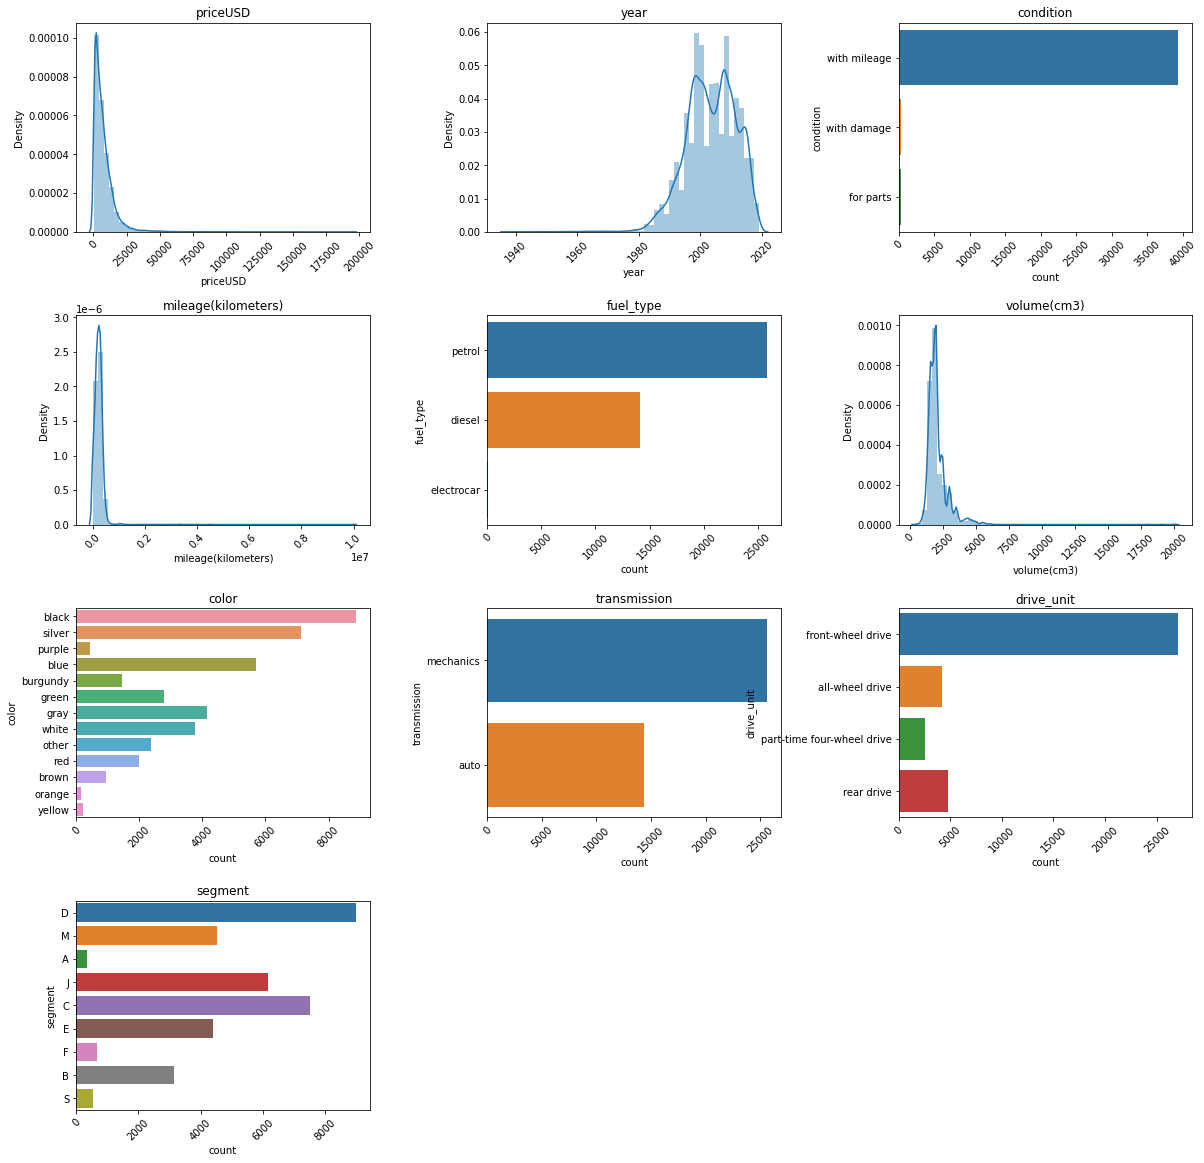

In [ ]:
fig=plt.figure(figsize=(20,20))
cols=3
plt.subplots_adjust(wspace=0.4,hspace=0.4)
rows=int(np.ceil((df_car.shape[1])/cols))
for i,column in enumerate(df_car.columns):
  ax=fig.add_subplot(rows,cols,i+1)
  ax.set_title(column)
  if df_car[column].dtype==np.object:
    sns.countplot(y=column,data=df_car)
    plt.xticks(rotation=45)
  else:
    sns.distplot(df_car[column])
    plt.xticks(rotation=45)


0.05 is the threshold for rejecting null hypothesis(That the two variables are independent) at 5 percent level(95% confidence).

In [ ]:
from scipy.stats import chi2_contingency
res=chi2_contingency(pd.crosstab(df_car['segment'],df_car['mileage(kilometers)']))
print("Chi 2 statistic={} ,p value={}".format(res[0],res[1]))

Chi 2 statistic=52425.31363991415 ,p value=2.3154742283583197e-65


As we can see that the p value is very small this means that we reject the Null hypothesis(which says that two variables are independent).Therefore segment and mileage are correlated

In [ ]:
res_drive=chi2_contingency(pd.crosstab(df_car['drive_unit'],df_car['mileage(kilometers)']))
print("Chi 2 statistic={} ,p value={}".format(res_drive[0],res_drive[1]))

Chi 2 statistic=21123.629465616297 ,p value=1.504715064188059e-31


In [ ]:
chi2_contingency(pd.crosstab(df_car['priceUSD'],df_car['condition'])
)

(12909.664133376846, 0.0, 5018, array([[0.00805 , 0.008525, 0.983425],
        [0.0322  , 0.0341  , 3.9337  ],
        [0.00805 , 0.008525, 0.983425],
        ...,
        [0.00805 , 0.008525, 0.983425],
        [0.00805 , 0.008525, 0.983425],
        [0.00805 , 0.008525, 0.983425]]))

Now lets check the p values for priceUSD column

In [ ]:
chi_dict={}
reject_null=[]
for i,column in enumerate(df_car.columns[1:]):
  if column=='priceUSD':
    continue
  chi_dict[i]=chi2_contingency(pd.crosstab(df_car['priceUSD'],df_car[column]))
  print("For {} ,Chi 2 statistic={} ,p value={}".format(column,chi_dict[i][0],chi_dict[i][1]))
  if chi_dict[i][1]<5e-2:
    reject_null.append(column)

For model ,Chi 2 statistic=3711387.9856253127 ,p value=0.0
For year ,Chi 2 statistic=233290.885539682 ,p value=0.0
For condition ,Chi 2 statistic=12909.664133376846 ,p value=0.0
For mileage(kilometers) ,Chi 2 statistic=26580629.38135504 ,p value=0.0
For fuel_type ,Chi 2 statistic=17883.399963000284 ,p value=0.0
For volume(cm3) ,Chi 2 statistic=2354318.9876441965 ,p value=0.0
For color ,Chi 2 statistic=37507.72199967777 ,p value=1.0645090460343019e-172
For transmission ,Chi 2 statistic=13568.637974814648 ,p value=0.0
For drive_unit ,Chi 2 statistic=17554.45502129841 ,p value=0.0
For segment ,Chi 2 statistic=31953.09082691033 ,p value=0.0


Chi2_contingency doesn't work very well as there are many numerical values so we can find statistical correlation by converting the categorical into one-hot vectors and then finding the correlation coefficient

In [ ]:
df_car.shape

(40000, 12)

There are quite a few null values in drive_unit and segment before drawing conclusions these data points have to be dealt with(And we fill the volume null values with 0 as they are only null for the electric cars and we don't lose anything by making these columns 0

In [ ]:
df_car.isnull().sum()

make                      0
model                     0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              30
color                     0
transmission              0
drive_unit             1345
segment                3755
dtype: int64

In [ ]:
#AS we can see the electric cars have NaN in volume as volume of engine doesn't make sense for an electric engine 
df_car[df_car['volume(cm3)'].isna()]
df_car['volume(cm3)']=df_car['volume(cm3)'].fillna(0)

In [ ]:
df_car.fillna(method='ffill',inplace=True)

Both segment and drive unit features definitely have an impact on the mileage so to make predictions for mileage these variables should be included

We now convert the categorical variables except make and model to its one-hot vectors and check the correlation coefficient to see the relationship between price and these variable.

In [ ]:
co=pd.get_dummies(df_car['drive_unit']).columns
df_car[co]=pd.get_dummies(df_car['drive_unit'])

In [ ]:
co_seg=pd.get_dummies(df_car['segment']).columns
df_car[co_seg]=pd.get_dummies(df_car['segment'])

In [ ]:
co_cond=pd.get_dummies(df_car['condition']).columns
df_car[co_cond]=pd.get_dummies(df_car['condition'])

In [ ]:
co_fuel=pd.get_dummies(df_car['fuel_type']).columns
df_car[co_fuel]=pd.get_dummies(df_car['fuel_type'])

In [ ]:
co_trans=pd.get_dummies(df_car['transmission']).columns
df_car[co_trans]=pd.get_dummies(df_car['transmission'])

In [ ]:
co_color=pd.get_dummies(df_car['color']).columns
df_car[co_color]=pd.get_dummies(df_car['color'])

In [ ]:
df_car.corr()['priceUSD'].sort_values(ascending=False)#These are the correlation coefficients of the columns with priceUSD 

priceUSD                      1.000000
year                          0.608822
auto                          0.449840
all-wheel drive               0.383716
J                             0.354641
volume(cm3)                   0.265881
black                         0.212367
part-time four-wheel drive    0.150283
S                             0.136596
diesel                        0.098744
brown                         0.097238
electrocar                    0.096777
with mileage                  0.088580
white                         0.080398
F                             0.052158
gray                          0.043662
orange                       -0.004832
M                            -0.013726
yellow                       -0.015589
other                        -0.023413
A                            -0.029556
rear drive                   -0.031588
purple                       -0.032990
E                            -0.039598
with damage                  -0.051001
silver                   

In [ ]:
#only those columns with correlation above 0.2
cols_to_keep=(df_car.corr()['priceUSD'][np.abs(df_car.corr()['priceUSD'].sort_values(ascending=False))>=0.2].index)

In [ ]:
cols_to_keep[1:]

Index(['year', 'volume(cm3)', 'all-wheel drive', 'front-wheel drive', 'J',
       'auto', 'mechanics', 'black'],
      dtype='object')

In [ ]:
cols_abs=(df_car.corr()['priceUSD'][np.abs(df_car.corr()['priceUSD'].sort_values(ascending=False))>=0.1].index)
cols_abs

Index(['priceUSD', 'year', 'mileage(kilometers)', 'volume(cm3)',
       'all-wheel drive', 'front-wheel drive', 'part-time four-wheel drive',
       'C', 'D', 'J', 'S', 'petrol', 'auto', 'mechanics', 'black', 'blue',
       'green'],
      dtype='object')

In [ ]:
cols_abs[1:]

Index(['year', 'mileage(kilometers)', 'volume(cm3)', 'all-wheel drive',
       'front-wheel drive', 'part-time four-wheel drive', 'C', 'D', 'J', 'S',
       'petrol', 'auto', 'mechanics', 'black', 'blue', 'green'],
      dtype='object')

These are the most heavily correlated variables with priceUSD so as we can see color,fuel_type and condition doesn't have any component which determines priceUSD so we are better off dropping these columns while making predictions

In [ ]:
df_car_labels=df_car['priceUSD']

In [ ]:
df_car.drop(['priceUSD','fuel_type','color','condition','drive_unit','segment','transmission'],axis=1,inplace=True)

In [ ]:
#df_car.drop(list(co_color)+list(co_fuel)+list(co_cond)+['fuel_type','color','condition','drive_unit','segment','transmission'],axis=1,inplace=True)

In [ ]:
#df_car=df_car[cols_to_keep]

In [ ]:
df_car

,make,model,year,mileage(kilometers),volume(cm3),all-wheel drive,front-wheel drive,part-time four-wheel drive,rear drive,A,B,C,D,E,F,J,M,S,for parts,with damage,with mileage,diesel,electrocar,petrol,auto,mechanics,black,blue,brown,burgundy,gray,green,orange,other,purple,red,silver,white,yellow
0,honda,accord,1993,960015.0,2000.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,ford,fusion,2008,172000.0,1400.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,nissan,teana,2008,223000.0,2500.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,volkswagen,fox,2005,140000.0,1200.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
4,nissan,primera,2002,413000.0,2200.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,jeep,grand-cherokee,2008,214000.0,3700.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
39996,peugeot,607,2001,295000.0,2200.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
39997,mercedes-benz,c-klass,1999,0.0,2200.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
39998,proton,persona,1996,250000.0,1300.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
df_car_labels

0          565
1         5550
2         8300
3         3300
4         2450
         ...  
39995    12500
39996     4754
39997     4000
39998     1200
39999      744
Name: priceUSD, Length: 40000, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,mean_squared_error
X_train, X_test, y_train, y_test=train_test_split(df_car[cols_to_keep[1:]],df_car_labels,test_size=0.2)

In [ ]:
forestreg=RandomForestRegressor()


In [ ]:
forestreg.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
for i,j in zip(df_car.columns,forestreg.feature_importances_):
  print(i,j)

make 0.6260858317072582
model 0.29929970092251035
year 0.021157012950392275
mileage(kilometers) 0.012447734391448511
volume(cm3) 0.015197279940410157
all-wheel drive 0.0056707140760000555
front-wheel drive 0.006634936052505138
part-time four-wheel drive 0.013506789959475306


In [ ]:
y_pred=forestreg.predict(X_train)

In [ ]:
y_pred

array([ 3282.27857143, 10886.09827412,  1021.68329431, ...,
        7343.79619986,  6637.26709017,   946.18711413])

In [ ]:
y_train

6016      2450
18124    10700
4407       700
29389     5650
23060    11600
         ...  
19674     6300
34416     5500
20384     8000
19858     5800
20612      750
Name: priceUSD, Length: 32000, dtype: int64

In [ ]:
mean_squared_error(y_train,y_pred,squared=False)

2396.5497414062647

In [ ]:
y_pred_test=forestreg.predict(X_test)

In [ ]:
y_pred_test

array([ 2839.73337939, 11472.14721825,  6359.49574878, ...,
       19275.44750527,  2063.77429314,  5789.31928571])

In [ ]:
y_test

19556     4700
4557     12200
4486      6200
32050      900
31371     5550
         ...  
20268     1900
3783      2550
29461    20500
14685     1750
35325     7000
Name: priceUSD, Length: 8000, dtype: int64

In [ ]:
mean_squared_error(y_test,y_pred_test,squared=False)

4098.059188145959

Now lets try with keeping more columns in the data(absolute value of correlation coefficent greater than 0.1)

In [ ]:
X_data=df_car[cols_abs[1:]]
scaler=StandardScaler()
X_data

,year,mileage(kilometers),volume(cm3),all-wheel drive,front-wheel drive,part-time four-wheel drive,C,D,J,S,petrol,auto,mechanics,black,blue,green
0,1993,960015.0,2000.0,0,1,0,0,1,0,0,1,0,1,1,0,0
1,2008,172000.0,1400.0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,2008,223000.0,2500.0,0,1,0,0,1,0,0,1,1,0,0,0,0
3,2005,140000.0,1200.0,0,1,0,0,0,0,0,1,0,1,0,1,0
4,2002,413000.0,2200.0,0,1,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,2008,214000.0,3700.0,1,0,0,0,0,1,0,1,1,0,0,0,0
39996,2001,295000.0,2200.0,0,1,0,0,0,0,0,1,0,1,0,1,0
39997,1999,0.0,2200.0,0,0,0,0,1,0,0,0,0,1,0,0,0
39998,1996,250000.0,1300.0,0,1,0,0,1,0,0,1,0,1,0,0,0


In [ ]:
X_data.iloc[:,:3]=scaler.fit_transform(X_data.iloc[:,:3])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [ ]:
X_data

,year,mileage(kilometers),volume(cm3),all-wheel drive,front-wheel drive,part-time four-wheel drive,C,D,J,S,petrol,auto,mechanics,black,blue,green
0,-1.292161,2.262657,-0.108096,0,1,0,0,1,0,0,1,0,1,1,0,0
1,0.556314,-0.225555,-0.746309,0,1,0,0,0,0,0,0,0,1,0,0,0
2,0.556314,-0.064519,0.423747,0,1,0,0,1,0,0,1,1,0,0,0,0
3,0.186619,-0.326597,-0.959047,0,1,0,0,0,0,0,1,0,1,0,1,0
4,-0.183076,0.535419,0.104641,0,1,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.556314,-0.092937,1.700173,1,0,0,0,0,1,0,1,1,0,0,0,0
39996,-0.306308,0.162826,0.104641,0,1,0,0,0,0,0,1,0,1,0,1,0
39997,-0.552771,-0.768657,0.104641,0,0,0,0,1,0,0,0,0,1,0,0,0
39998,-0.922466,0.020735,-0.852678,0,1,0,0,1,0,0,1,0,1,0,0,0


In [ ]:
X_train_abs, X_test_abs, y_train_abs, y_test_abs=train_test_split(X_data,df_car_labels,test_size=0.2)

In [ ]:
foreg=RandomForestRegressor()

In [ ]:
foreg.fit(X_train_abs,y_train_abs)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred_abs=foreg.predict(X_train_abs)

In [ ]:
#Root mean squared error
mean_squared_error(y_train_abs,y_pred_abs,squared=False)#default setting of hyperparameters gives us best result

1309.4342677773684

In [ ]:
foreg.score(X_train_abs,y_train_abs)# R^2 value

0.9753204708422863

We can try randomized search for hyperparameters if any other value other than the defaults perform any better

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
randcv=RandomizedSearchCV(forestreg,random_grid,verbose=4)
randcv.fit(X_train_abs,y_train_abs)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=False 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=False, score=0.814, total=  40.5s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=False 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   40.5s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=False, score=0.820, total=  40.3s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=False 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.3min remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=False, score=0.836, total=  41.5s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=False 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.0min remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=False, score=0.822, total=  40.1s
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=False 
[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=110, bootstrap=False, score=0.832, total=  40.1s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True, score=0.857, total=  29.4s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=100, bootstrap=True, score=0.819, total=  29.4s
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_features=sqrt,

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 38.1min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                           

In [ ]:
mean_squared_error(randcv.best_estimator_.predict(X_train_abs),y_train_abs,squared=False)

1951.8226292317042

The error comes out to be higher! ,this means that default values of hyperparameters works fine

Lets try it out with all columns included by encoding the make and model columns using a bacward difference encoder

In [ ]:
!pip install category_encoders
import category_encoders as ce
df_copy=df_car.copy()

     |████████████████████████████████| 81kB 6.0MB/s 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
cols=['make','model']
df_copy

,make,model,year,mileage(kilometers),volume(cm3),all-wheel drive,front-wheel drive,part-time four-wheel drive,rear drive,A,B,C,D,E,F,J,M,S,for parts,with damage,with mileage,diesel,electrocar,petrol,auto,mechanics,black,blue,brown,burgundy,gray,green,orange,other,purple,red,silver,white,yellow
0,honda,accord,1993,960015.0,2000.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,ford,fusion,2008,172000.0,1400.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,nissan,teana,2008,223000.0,2500.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,volkswagen,fox,2005,140000.0,1200.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
4,nissan,primera,2002,413000.0,2200.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,jeep,grand-cherokee,2008,214000.0,3700.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
39996,peugeot,607,2001,295000.0,2200.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
39997,mercedes-benz,c-klass,1999,0.0,2200.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
39998,proton,persona,1996,250000.0,1300.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
encoder = ce.BackwardDifferenceEncoder(cols=cols)
df_bd = encoder.fit_transform(df_copy)
df_bd

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,intercept,make_0,make_1,make_2,make_3,make_4,make_5,make_6,make_7,make_8,make_9,make_10,make_11,make_12,make_13,make_14,make_15,make_16,make_17,make_18,make_19,make_20,make_21,make_22,make_23,make_24,make_25,make_26,make_27,make_28,make_29,make_30,make_31,make_32,make_33,make_34,make_35,make_36,make_37,make_38,...,model_987,model_988,model_989,year,mileage(kilometers),volume(cm3),all-wheel drive,front-wheel drive,part-time four-wheel drive,rear drive,A,B,C,D,E,F,J,M,S,for parts,with damage,with mileage,diesel,electrocar,petrol,auto,mechanics,black,blue,brown,burgundy,gray,green,orange,other,purple,red,silver,white,yellow
0,1,-0.989247,-0.978495,-0.967742,-0.956989,-0.946237,-0.935484,-0.924731,-0.913978,-0.903226,-0.892473,-0.88172,-0.870968,-0.860215,-0.849462,-0.83871,-0.827957,-0.817204,-0.806452,-0.795699,-0.784946,-0.774194,-0.763441,-0.752688,-0.741935,-0.731183,-0.72043,-0.709677,-0.698925,-0.688172,-0.677419,-0.666667,-0.655914,-0.645161,-0.634409,-0.623656,-0.612903,-0.602151,-0.591398,-0.580645,...,-0.003027,-0.002018,-0.001009,1993,960015.0,2000.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.010753,-0.978495,-0.967742,-0.956989,-0.946237,-0.935484,-0.924731,-0.913978,-0.903226,-0.892473,-0.88172,-0.870968,-0.860215,-0.849462,-0.83871,-0.827957,-0.817204,-0.806452,-0.795699,-0.784946,-0.774194,-0.763441,-0.752688,-0.741935,-0.731183,-0.72043,-0.709677,-0.698925,-0.688172,-0.677419,-0.666667,-0.655914,-0.645161,-0.634409,-0.623656,-0.612903,-0.602151,-0.591398,-0.580645,...,-0.003027,-0.002018,-0.001009,2008,172000.0,1400.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0.010753,0.021505,-0.967742,-0.956989,-0.946237,-0.935484,-0.924731,-0.913978,-0.903226,-0.892473,-0.88172,-0.870968,-0.860215,-0.849462,-0.83871,-0.827957,-0.817204,-0.806452,-0.795699,-0.784946,-0.774194,-0.763441,-0.752688,-0.741935,-0.731183,-0.72043,-0.709677,-0.698925,-0.688172,-0.677419,-0.666667,-0.655914,-0.645161,-0.634409,-0.623656,-0.612903,-0.602151,-0.591398,-0.580645,...,-0.003027,-0.002018,-0.001009,2008,223000.0,2500.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0.010753,0.021505,0.032258,-0.956989,-0.946237,-0.935484,-0.924731,-0.913978,-0.903226,-0.892473,-0.88172,-0.870968,-0.860215,-0.849462,-0.83871,-0.827957,-0.817204,-0.806452,-0.795699,-0.784946,-0.774194,-0.763441,-0.752688,-0.741935,-0.731183,-0.72043,-0.709677,-0.698925,-0.688172,-0.677419,-0.666667,-0.655914,-0.645161,-0.634409,-0.623656,-0.612903,-0.602151,-0.591398,-0.580645,...,-0.003027,-0.002018,-0.001009,2005,140000.0,1200.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0.010753,0.021505,-0.967742,-0.956989,-0.946237,-0.935484,-0.924731,-0.913978,-0.903226,-0.892473,-0.88172,-0.870968,-0.860215,-0.849462,-0.83871,-0.827957,-0.817204,-0.806452,-0.795699,-0.784946,-0.774194,-0.763441,-0.752688,-0.741935,-0.731183,-0.72043,-0.709677,-0.698925,-0.688172,-0.677419,-0.666667,-0.655914,-0.645161,-0.634409,-0.623656,-0.612903,-0.602151,-0.591398,-0.580645,...,-0.003027,-0.002018,-0.001009,2002,413000.0,2200.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,1,0.010753,0.021505,0.032258,0.043011,0.053763,0.064516,0.075269,0.086022,0.096774,0.107527,0.11828,0.129032,0.139785,0.150538,0.16129,0.172043,0.182796,0.193548,0.204301,0.215054,0.225806,0.236559,0.247312,0.258065,0.268817,0.27957,0.290323,0.301075,0.311828,0.322581,0.333333,0.344086,0.354839,0.365591,0.376344,0.387097,0.397849,0.408602,0.419355,...,-0.003027,-0.002018,-0.001009,2008,214000.0,3700.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3

In [ ]:
df_bd['intercept'].unique()

array([1])

In [ ]:
df_bd.drop(['intercept'],axis=1,inplace=True)

In [ ]:
for1=RandomForestRegressor()
for1.fit(df_bd,df_car_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y=for1.predict(df_bd)

In [ ]:
mean_squared_error(df_car_labels,y,squared=False)#Lowest RMSE out of all models 

1088.8301067041057

Minimum error is obtained when even make and model is encoded using but this takes too long to train hence isnt a very viable option if new data were to be added constantly ,but if model needs to be trained only once then its a good model

In [ ]:
filename='Allcolsincludedmodel.sav'
filename2='Abridgedmodel.sav'
pickle.dump(for1, open(filename, 'wb'))
pickle.dump(foreg,open(filename2,'wb'))


In [ ]:
from google.colab import files 
files.download(filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
loaded_model=pickle.load(open(filename,'rb'))


In [ ]:
loaded_model.predict(df_bd)

array([ 867.84, 5160.44, 8143.02, ..., 3805.17, 1067.12,  899.09])